# Coursework I

This notebook describes the first part of the ML coursework (code).  This part builds on work that you have already done during the labs.  The purpose of this coursework, along with the previous lab work, is to:
- Get familiar with **common python modules / functions** used for ML in python
- Get practical experience **implementing** ML methods in python  
- Get practical experience regarding **parameter selection** for ML methods
- Get practical experience on **evaluating** ML methods and applying cross-validation

Notes:
- CW based on work that you did in the lab - don't use libraries that implement kNN or cross-validation.  We want to see your code!
- For more details, read the coursework PDF on learn.gold

In [212]:
%matplotlib inline


from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
# Load the IRIS dataset, as in the labs
mySeed=1234567

iris = datasets.load_iris()

X=iris.data 
y=iris.target 

print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## 1. Exploratory Data Analysis

In Lab 2, we discussed how the first part of tackling an ML problem is visualization, in order to understand some of the properties of the problem at-hand.  In the same lab, you were asked to reproduce a figure that plots pairs of features used in our problem.  Fill-in the code you used to plot this figure from Lab 2 in the cell below.  

You should create a function that given data X and labels y plots the 4x4 grid.  The function should be invoked as
    
    myplotGrid(X,y)
    
where X is your training data and y are the labels

In [213]:
def myplotGrid(X, y):
    fig = plt.figure(figsize=(20,20))

    counter = 0
    for i in range(0,4):
        for j in range(0,4):
            counter += 1

            if i == j:
                ax = fig.add_subplot(4,4,counter)
                ax.hist(X[:, i])
                plt.xlabel('Sepal length') 
                plt.ylabel('Sepal width')
            else:
                ax = fig.add_subplot(4,4,counter)
                ax.scatter(X[:, i], X[:, j], c=y, cmap=plt.cm.Paired)
                plt.xlabel('Sepal length') 
                plt.ylabel('Sepal width')
    




### 1.2. Exploratory Data Analysis under noise

When data are collected under real-world settings (e.g., from webcams or other errors) they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,


    np.random.seed(mySeed) # initialize random seed to replicate results over different runs
    XN=X+np.random.normal(0,0.5,X.shape)
    
and then invoke

    myplotGrid(XN,y)

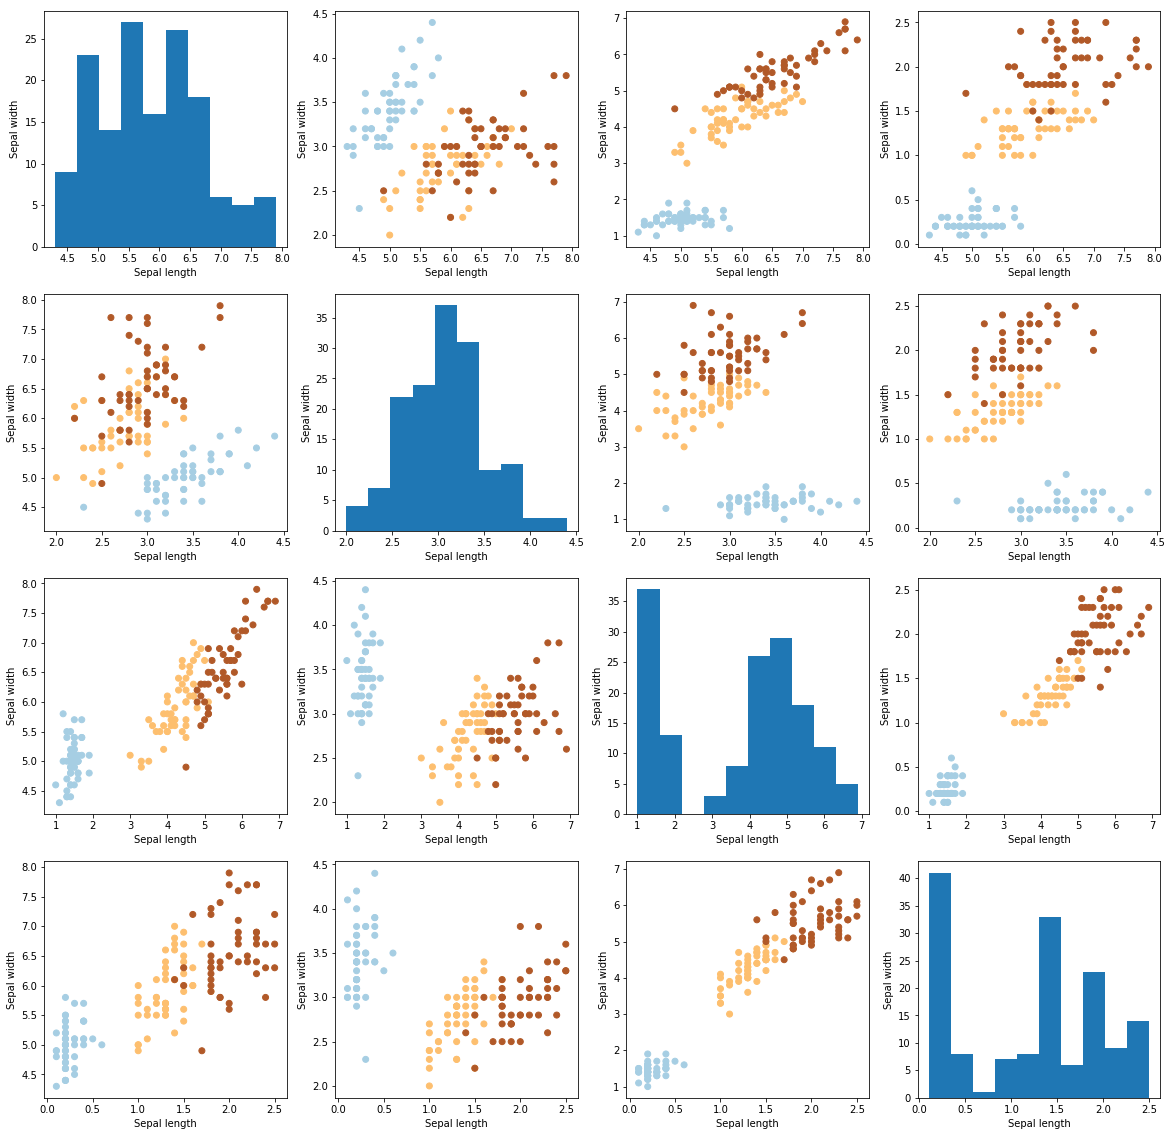

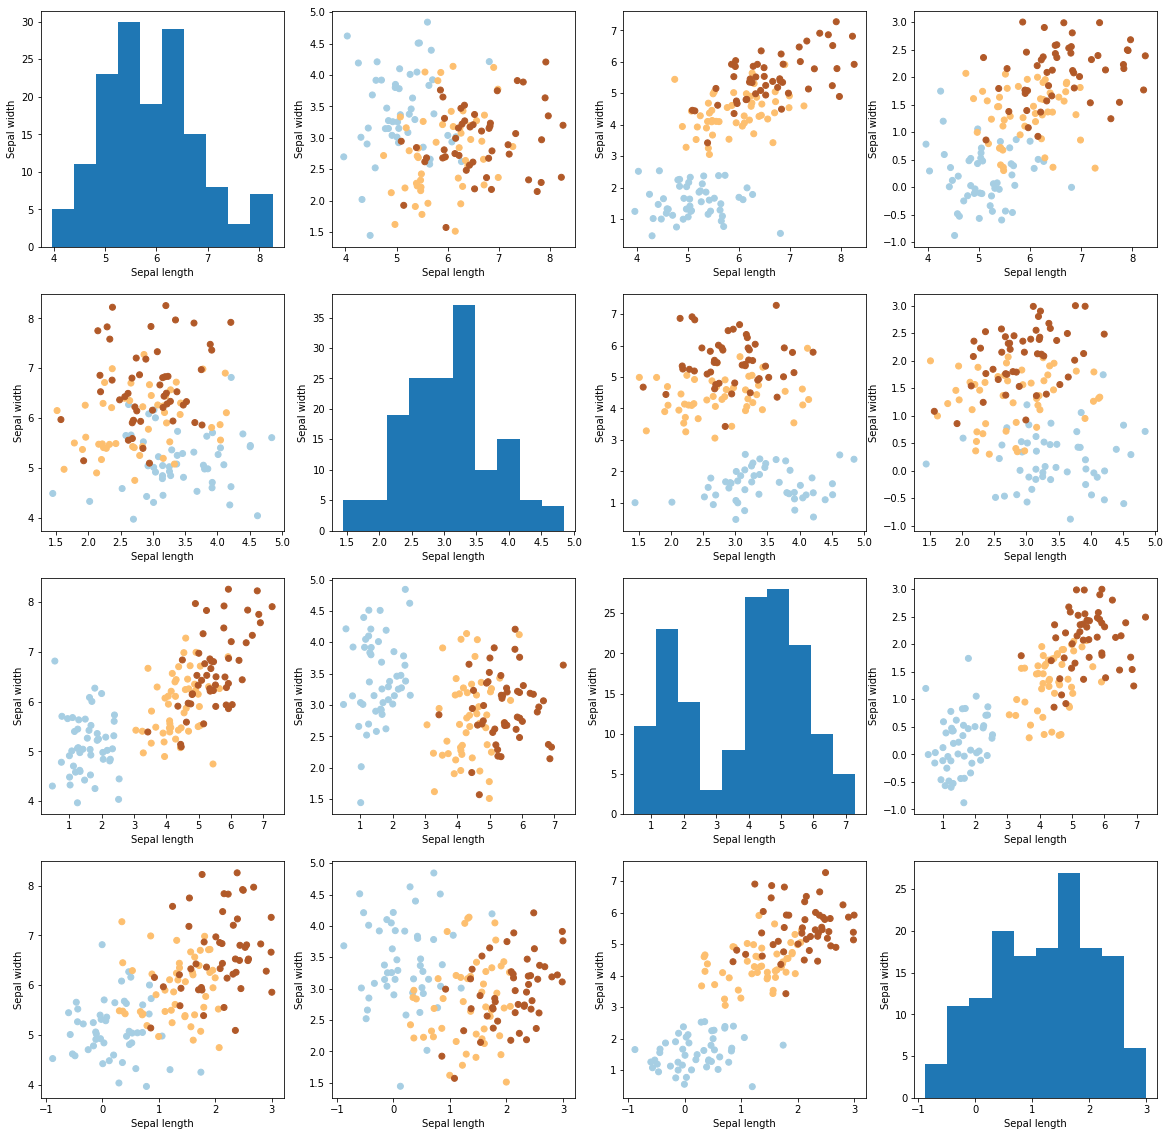

In [214]:
np.random.seed(mySeed) # initialize random seed to replicate results over different runs
XN=X+np.random.normal(0,0.5,X.shape)

myplotGrid(X,y)
myplotGrid(XN,y)

## 2. Implementing kNN

In the cell below, develop your own code for performing k-Nearest Neighbour classification.  You are guided to do this by following the notebook in Lab 4.  Define a function that performs k-NN given a set of data.  Your function should be invoked similary to:

        y_ = mykNN(X,y,X_,options)
        
where X is your training data, y is your training outputs, X\_ are your testing data and y\_ are your predicted outputs for X\_.  The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

In [230]:
#mykNN
#foldTest = X_
#foldTrain = X

def euclideanDistance(in1,in2):
    return np.linalg.norm(in1-in2) 

def manhattanDistance(in1, in2):
    return np.abs(in1[:,None] - in2).sum(-1)

def assignLabel(nLabels):
    if len(nLabels) ==  1:
         return nLabels[0]
    
    #counts
    conti = np.bincount(nLabels)
    most_frequent = np.argmax(conti)  
    
    return most_frequent # label assigned to test point x_

# Input: x_ : point in test data
#       ;
#       n   : number of neighbours to return
#       T   : total number of training data
# Output: n-nearest neighbours of x_ in training data X
    def getNeighbours(x_,X,n,T, dist): # where T is number of data
        dist = []
        for i in range(T):
            if dist == 'manhattan':
                f = manhattanDistance(x_, X[i])
                dist.append(f)
            else:
                f = euclideanDistance(x_,X[i])
                dist.append(f)


        dist = np.argsort(dist)#sorted

        return dist[:n] # indices of n-nearest neighbours in training data

def most_frequent(List):
    return max(set(List), key = List.count) 

# X is training data == X[foldTrain]
# X_ testing data == y[foldTest]
# y is training output
def mykNN(X, y, X_, n, dist):
    
    #get the neighbours
    final = []
    for i in range(len(X_)):
        x_= X_[i]
        neighbours = getNeighbours(x_, X, n, X.shape[0], dist)
        listofy = y[neighbours] #y in 5 bins is size of 30 each 
        final.append(assignLabel(listofy))
    
    return final


#print(j[0])


## 3. Nested Cross-validation using your implementation of KNN

In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above.  Again, you are guided to complete this task by following the appropriate notebook in Lab 4.  Your code for nested cross-validation should invoke your kNN function (see above).  You cross validation function should be invoked similary to:

    accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
    
where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, ``list(range(1,11)`` evaluates the neighbour parameter from 1 to 10, and ``['euclidean','manhattan']`` evaluates the two distances on the validation sets.  mySeed is simply a random seed to enable us to replicate your results.

**Notes:** 
- ✓ you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN) 
- ✓ you should implement/validate at least two distance functions
- ✓ you should evaluate number of neighbours from 1 to 10
- ✓ your function should return a list of accuracies per fold
- 2/3✓ for each fold, your function should print:
  - ✓ the accuracy per distinct set of parameters on the validation set
  - ✓ the best set of parameters for the fold after validation
  - ?? the confusion matrix per fold (on the testing set)


In [231]:
def myAccuracy(y_acc_test, y_pred):
    accuracy = len(np.where(y_acc_test == y_pred)[0])/y_acc_test.size *100
    return accuracy 

def myConfMat(y_acc_test, y_pred, classno):
    C = np.zeros((classno,classno), dtype = int)
    for i in range(len(y_acc_test)):
        C[y_acc_test[i], y_pred[i]]+=1
    return C

def myNestedCrossVal(X,y,foldK,nns,dists,mySeed):
    np.random.seed(mySeed)
    acc_test = [] #list to store acc_testing accuracy
    accuracy_fold = [] #list to store accuracies folds
    

    shuffled_indices = np.random.permutation(X.shape[0])
    bins = np.array_split(shuffled_indices, foldK)
    
    assert(foldK==len(bins))
    
    #loop through folds
    for i in range(0,foldK):
        foldTrain=[] # list to save current indices for TRAINING,foldTrain
        foldTest=[]  # list to save current indices for acc_testING,foldTest
        foldVal=[]   # list to save current indices for VALIDATION,foldVal

        foldTest.extend(bins[i])
        
        for j in range(0,len(bins)):
            if j != i:
                foldTrain.extend(bins[j])
                
        if i+1 > len(bins)-1:    
            foldVal.extend(bins[0])  
        else:
            foldVal.extend(bins[i+1])
                    
        foldTrain = np.setdiff1d(foldTrain, foldVal)  
        foldTrain = foldTrain.tolist()  
        
        assert not np.intersect1d(foldTest,foldVal)
        assert not np.intersect1d(foldTrain,foldTest)
        assert not np.intersect1d(foldTrain,foldVal)
        
        bestDistance = '' #save the best distance metric here
        bestNN = -1 #save the best number of neighbours here
        bestAccuracy = -10 #save the best attained accuracy here (in terms of validation)

        for d in range(0,len(dists)):
            for n in range(0,len(nns)):
                myPred = mykNN(X[foldTrain], y[foldTrain], X[foldVal], nns[n], dists[d])
                
                acc = myAccuracy(y[foldVal], myPred)
                
                acc_test.append(acc)
                
                if np.amax(acc_test) > bestAccuracy:
                    bestAccuracy = np.amax(acc_test)
                    bestDistance = dists[d]
                    bestNN = acc_test.index(np.amax(acc_test)) + 1#index starts at 0 but lists starts at 1 hence + 1
        acc_test = []
        print('** End of val for this fold, best NN', bestNN, 'best Dist', bestDistance)
        
        foldTrain.extend(foldVal)
               
        y_pred = mykNN(X[foldTrain],y[foldTrain],X[foldTest],bestNN,bestDistance) 
        final_acc = myAccuracy(y[foldTest] ,y_pred)
        accuracy_fold.append(final_acc)
        
        print('==== Final Cross-val on acc_test on this fold with NN', bestNN, 'dist', bestDistance, ' accuracy ',final_acc)
        print(myConfMat(y[foldTest],y_pred,len(np.unique(y))))
    return accuracy_fold

accuracy_fold=myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print(accuracy_fold)

print("==========================")
print("Noise")
print("==========================")
accuracy_fold=myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)
print(accuracy_fold)



/Users/Ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/Ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
/Users/Ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


** End of val for this fold, best NN 3 best Dist euclidean
==== Final Cross-val on acc_test on this fold with NN 3 dist euclidean  accuracy  96.66666666666667
[[11  0  0]
 [ 0 10  1]
 [ 0  0  8]]
** End of val for this fold, best NN 4 best Dist euclidean
==== Final Cross-val on acc_test on this fold with NN 4 dist euclidean  accuracy  93.33333333333333
[[12  0  0]
 [ 0 11  0]
 [ 0  2  5]]
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on acc_test on this fold with NN 1 dist euclidean  accuracy  93.33333333333333
[[ 5  0  0]
 [ 0 13  1]
 [ 0  1 10]]
** End of val for this fold, best NN 4 best Dist euclidean
==== Final Cross-val on acc_test on this fold with NN 4 dist euclidean  accuracy  100.0
[[11  0  0]
 [ 0  7  0]
 [ 0  0 12]]
** End of val for this fold, best NN 1 best Dist euclidean
==== Final Cross-val on acc_test on this fold with NN 1 dist euclidean  accuracy  96.66666666666667
[[11  0  0]
 [ 0  6  1]
 [ 0  0 12]]
[96.66666666666667, 93.333333333